# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [ ]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


In [ ]:
# Take a peek at the datasets
!head train.dat
!head test.dat

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [2]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2)) 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0]) - 1)

    for epoch in range(epochs):
        for instance in instances:
            # Forward propagation: computing the net input
            net_input = dot_product(weights, instance)
            # Here Activation step: computing the output via the sigmoid function
            out = sigmoid(net_input)
            #Here i did Error computation: difference between actual label and model output
            error = instance[-1] - out
            # Backward propagation (gradient descent step): update each weight
            for i in range(len(weights)):
                # The derivative of the sigmoid function is out * (1 - out)
                weights[i] += lr * error * out * (1 - out) * instance[i]
    return weights

## Run it

In [3]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




# Question 1 Answer

During training, the gradient, necessary for updating the weights, is computed using the continuous  and differentiable  of the sigmoid output function. In the training code:

```
in_value = dot_product(weights, instance)

output = sigmoid(in_value)

error = instance[-1] - output 
```


The output value between 0 and 1 and reflects the model's confidence, allowing for an easier computation of both the error signal and its derivative `(via output * (1 - output))` for gradient descent. 

** If we use:

```
output = predict(weights, instance)
error = instance[-1] - output
```

the predict function applies a threshold `(i.e., outputs 1 if the sigmoid output is ≥ 0.5, otherwise 0).` This hard decision converts the continuous probability into a binary value, which is not differentiable. As a result, using predict would not provide the necessary gradient information to adjust the weights during training.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [12]:
import math
import re

def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line.
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        # Here i am Converting values to integers.
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias.
        instance = [-1] + instance
        data.append(instance)
    return data

def dot_product(array1, array2):
    # Return the dot product of array1 and array2.
    return sum(a * b for a, b in zip(array1, array2))

def sigmoid(x):
    # Return the output of the sigmoid function on x.
    return 1 / (1 + math.exp(-x))

def output(weights, instance):
    # Output Computing the model output by applying sigmoid on the dot product.
    return sigmoid(dot_product(weights, instance))

def predict(weights, instance):
    # 1 if output >= 0.5, else 0.
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    # Compute accuracy as the percent of correct predictions.
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize weights (including bias) to zero.
    weights = [0] * (len(instances[0]) - 1)
    for epoch in range(epochs):
        for instance in instances:
            # Computing the net input.
            net_input = dot_product(weights, instance)
            # Computing the output using sigmoid activation.
            out = sigmoid(net_input)
            # Computing the error (difference between true label and output).
            error = instance[-1] - out
            # Update weights (gradient descent update).
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]
    return weights

# Reading training and test data.
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]        # number of epochs
lr_array = [0.005, 0.01, 0.05]           # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



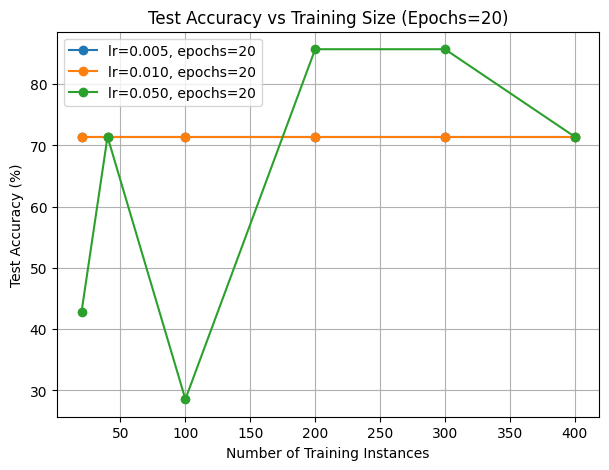

In [15]:
import math
import re
import matplotlib.pyplot as plt

def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line.
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias.
        instance = [-1] + instance
        data.append(instance)
    return data

def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def output(weights, instance):
    return sigmoid(dot_product(weights, instance))

def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0]) - 1)
    for epoch in range(epochs):
        for instance in instances:
            net_input = dot_product(weights, instance)
            out = sigmoid(net_input)
            error = instance[-1] - out
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]
    return weights

# Read data files.
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Hyperparameters
tr_percent  = [5, 10, 25, 50, 75, 100]   # percent of the training dataset to use
num_epochs  = [5, 10, 20, 50, 100]         # number of epochs
lr_array    = [0.005, 0.01, 0.05]           # learning rates

# For demonstration purpose, I collected results for a fixed number of epochs (e.g., epochs = 20)
# and the for each learning rate as we vary training set size.
fixed_epochs = 20
results_by_lr = {}  # Dictionary: learning rate -> (training sizes, accuracies)
for lr in lr_array:
    sizes = []
    accs = []
    for tr in tr_percent:
        size = round(len(instances_tr) * tr / 100)
        sizes.append(size)
        pre_instances = instances_tr[0:size]
        weights = train_perceptron(pre_instances, lr, fixed_epochs)
        acc = get_accuracy(weights, instances_te)
        accs.append(acc)
    results_by_lr[lr] = (sizes, accs)

#Finally Here i Plot the results.
plt.figure(figsize=(7,5))
for lr in lr_array:
    sizes, accs = results_by_lr[lr]
    plt.plot(sizes, accs, marker='o', label=f"lr={lr:.3f}, epochs={fixed_epochs}")
plt.xlabel("Number of Training Instances")
plt.ylabel("Test Accuracy (%)")
plt.title(f"Test Accuracy vs Training Size (Epochs={fixed_epochs})")
plt.legend()
plt.grid(True)
plt.show()


`A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?`

In general, a small subset of training data is sufficient, sometimes even outperforming a larger training set, if it is representative enough and if the hyperparameters (learning rate, number of epochs) are chosen satisfactorily. 

`B. How do you justify that training the second run obtains worse accuracy than the first one (despite using more data)?`

Because the learning rate and epochs used for the larger dataset might not be optimal. A lower learning rate with more data can cause very slow updates, leading to suboptimal convergence after only 20 epochs.

`C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?`

Yes. There are several runs in your results that already exceed 80%. More fine-tuned hyperparameter tuning with smaller learning-rate increments, different epoch settings, or alternative techniques such as regularization may push accuracy above 80%. 

` D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?`

Not necessarily. Higher epochs can get better accuracy if the model is still converging, but if it levels out or starts overfitting, additional training won't be of great benefit. Validation metrics will indicate where the ideal point is for the epochs. 